In [ ]:
jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --NotebookApp.port_retries=0 --notebook-dir="" --no-browser --allow-root --NotebookApp.token='' --NotebookApp.disable_check_xsrf=True --port=8888

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
!ls "/gdrive/My Drive/Final Project (8th Sem)/Frame_prediction_kitti/Train/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
0000000000.png	0000000006.png	0000000012.png	0000000018.png	0000000024.png
0000000001.png	0000000007.png	0000000013.png	0000000019.png	0000000025.png
0000000002.png	0000000008.png	0000000014.png	0000000020.png	0000000026.png
0000000003.png	0000000009.png	0000000015.png	0000000021.png	0000000027.png
0000000004.png	0000000010.png	0000000016.png	0000000022.png
0000000005.png	0000000011.png	0000000017.png	0000000023.png


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import os
import random
import cv2
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, merge, concatenate
from keras.layers.core import RepeatVector, Permute
from scipy import ndimage, misc
from sklearn.model_selection import train_test_split
import torch

Using TensorFlow backend.


['0000000000.png', '0000000001.png', '0000000002.png', '0000000003.png', '0000000004.png', '0000000005.png', '0000000006.png', '0000000007.png', '0000000008.png', '0000000009.png', '0000000010.png', '0000000011.png', '0000000012.png', '0000000013.png', '0000000014.png', '0000000015.png', '0000000016.png', '0000000017.png', '0000000018.png', '0000000019.png', '0000000020.png', '0000000021.png', '0000000022.png', '0000000023.png', '0000000024.png', '0000000025.png', '0000000026.png', '0000000027.png']
0000000000.png


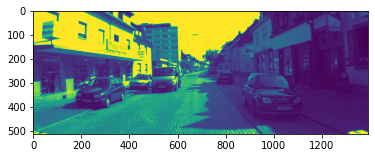

0000000001.png


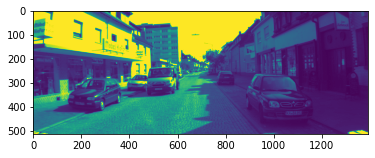

0000000002.png


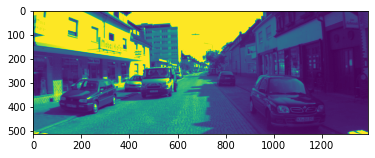

0000000003.png


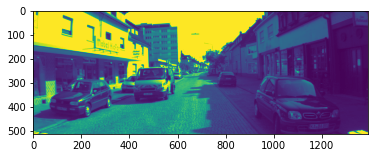

0000000004.png


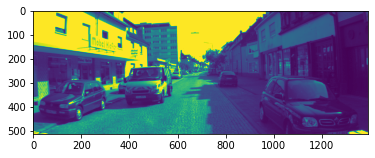

0000000005.png


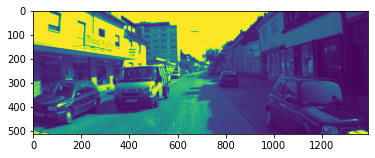

0000000006.png


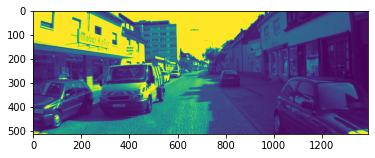

0000000007.png


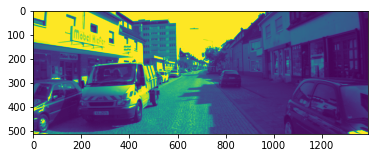

0000000008.png


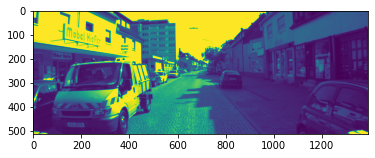

0000000009.png


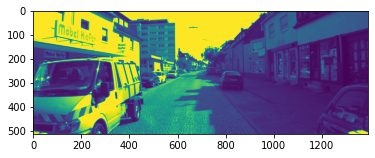

0000000010.png


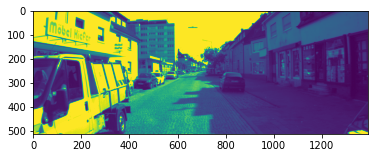

0000000011.png


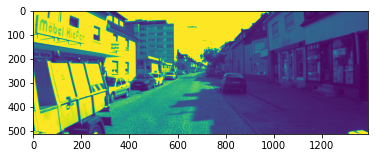

0000000012.png


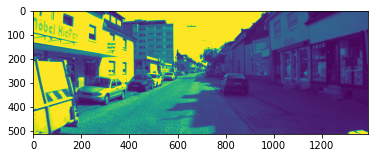

0000000013.png


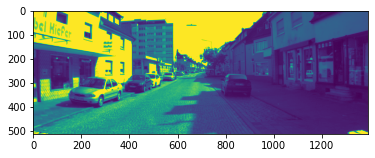

0000000014.png


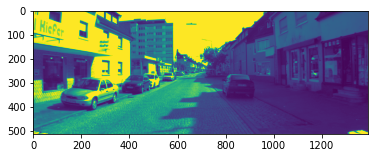

0000000015.png


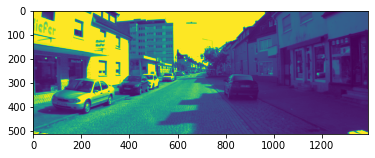

0000000016.png


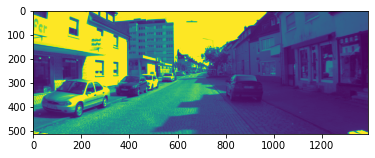

0000000017.png


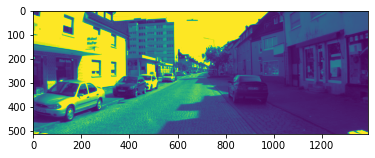

0000000018.png


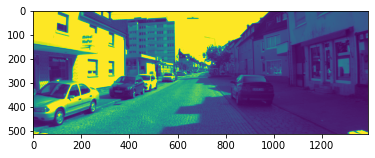

0000000019.png


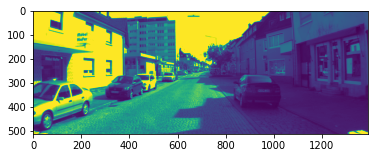

0000000020.png


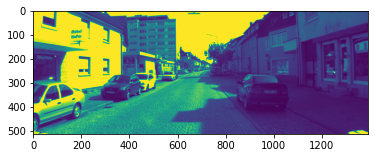

0000000021.png


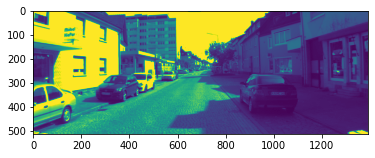

0000000022.png


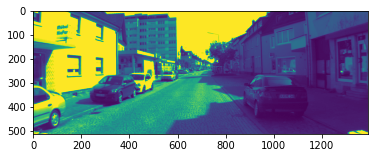

0000000023.png


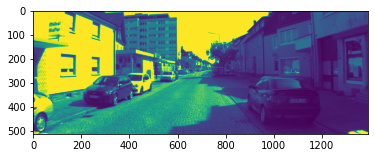

0000000024.png


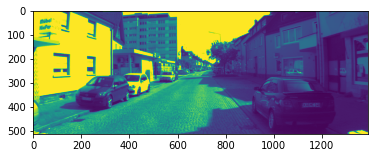

0000000025.png


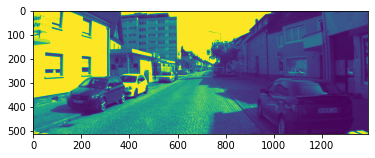

0000000026.png


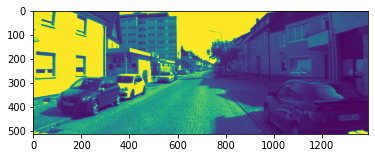

0000000027.png


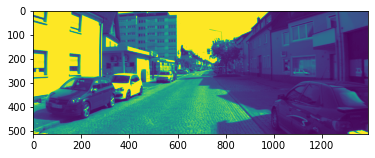

##################


In [ ]:
#import the images into a numpy array
X = []
names = os.listdir('/gdrive/My Drive/Final Project (8th Sem)/Frame_prediction_kitti/Train/')
names.sort()
print(names)
for filename in names:
    print(filename)
    img = cv2.imread('/gdrive/My Drive/Final Project (8th Sem)/Frame_prediction_kitti/Train/'+filename, 0)
    plt.imshow(img)
    X.append(img)
    plt.show()
X = np.array(X, dtype=float)
print("##################")
# for ele in X:
#   plt.imshow(ele)
#   plt.show()
X = 1.0/255*X

In [ ]:
# X = []
# for filename in os.listdir('/gdrive/My Drive/Final Project (8th Sem)/Frame_prediction_kitti/Train/'):
#     img = cv2.imread('/gdrive/My Drive/Final Project (8th Sem)/Frame_prediction_kitti/Train/'+filename, 0)
#     X.append(img)
# X = np.array(X, dtype=float)
# X = 1.0/255*X

In [ ]:
print(X.shape)
X = X.reshape(-1, 512, 1392, 1)
print(X.shape)

(28, 512, 1392)
(28, 512, 1392, 1)


['0000000000.png', '0000000001.png', '0000000002.png', '0000000003.png', '0000000004.png', '0000000005.png', '0000000006.png', '0000000007.png', '0000000008.png', '0000000009.png', '0000000010.png', '0000000011.png', '0000000012.png', '0000000013.png', '0000000014.png', '0000000015.png', '0000000016.png', '0000000017.png', '0000000018.png', '0000000019.png', '0000000020.png', '0000000021.png', '0000000022.png', '0000000023.png', '0000000024.png', '0000000025.png', '0000000026.png', '0000000027.png']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


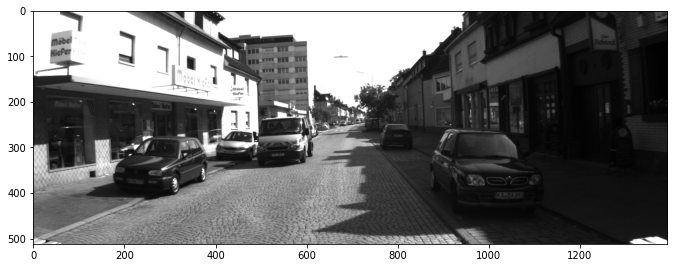

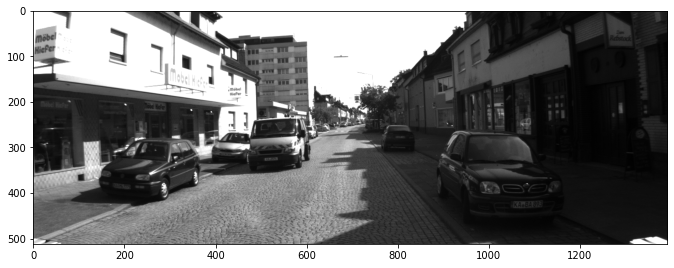

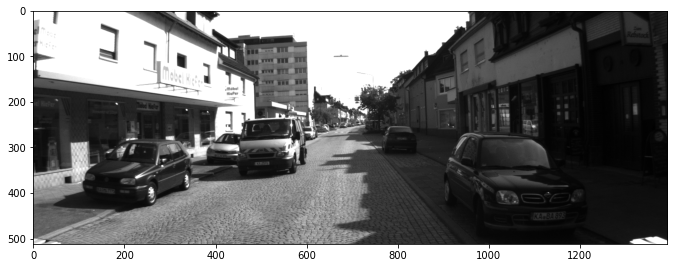

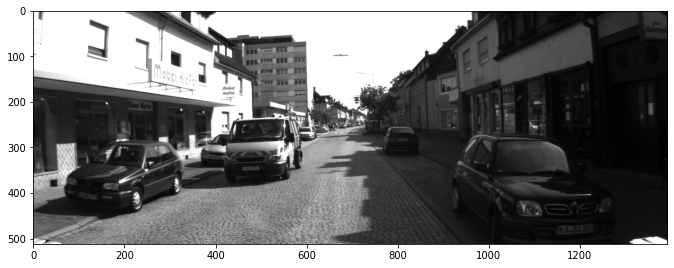

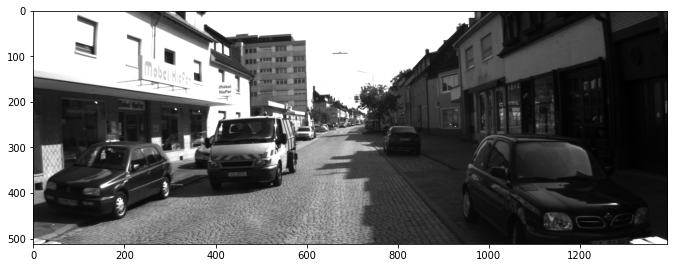

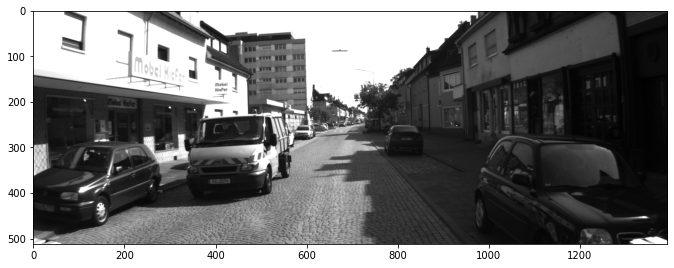

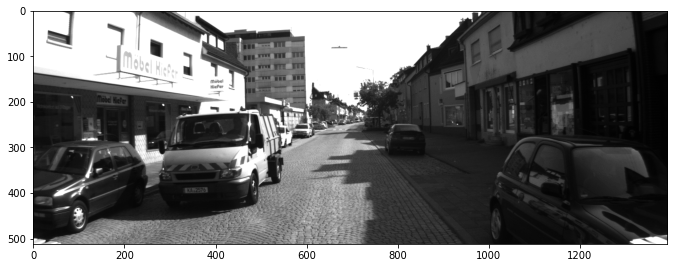

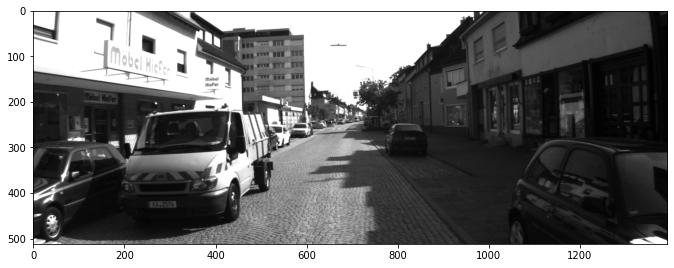

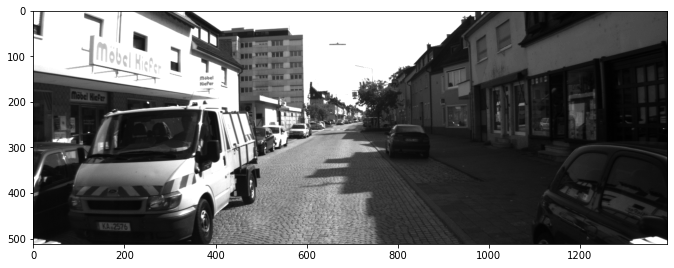

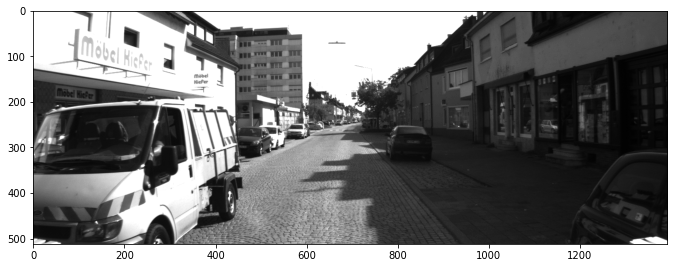

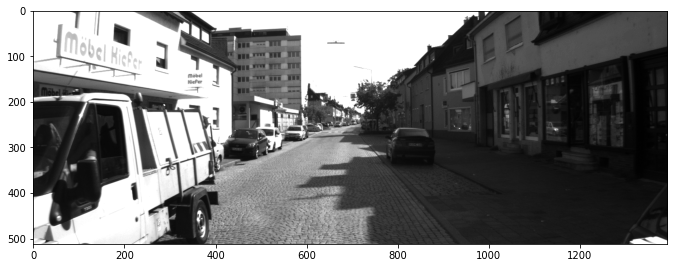

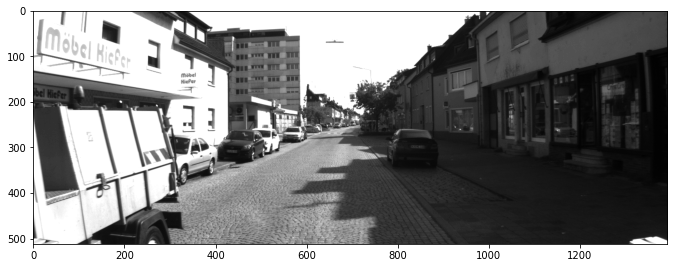

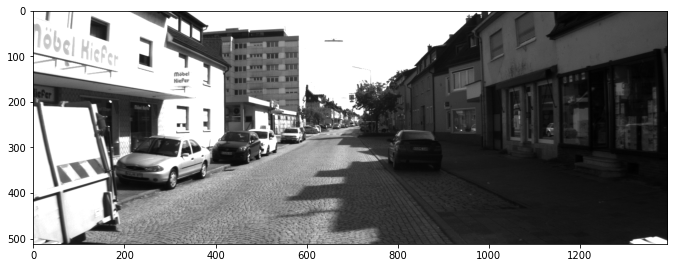

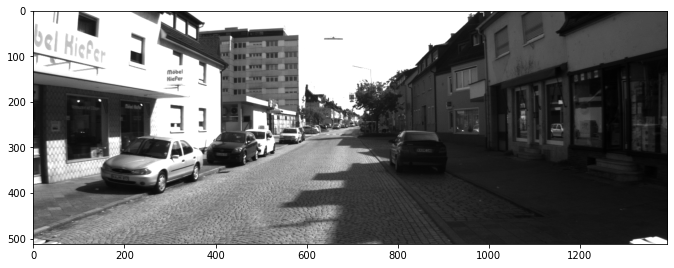

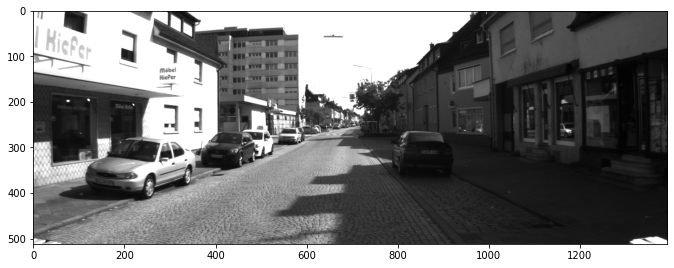

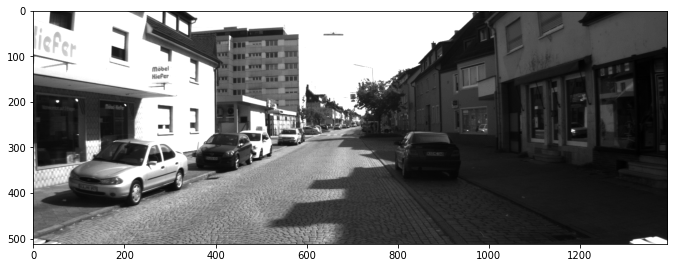

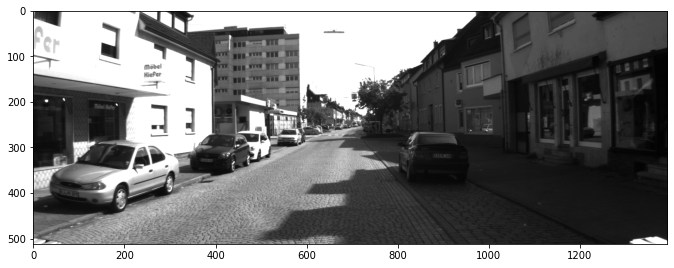

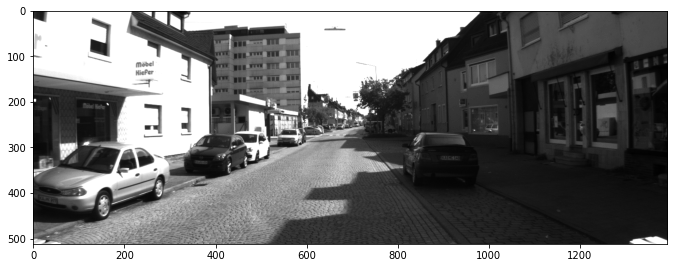

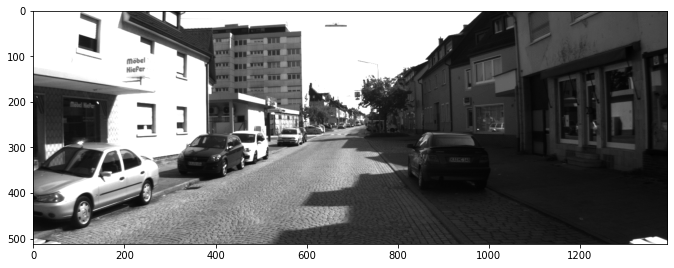

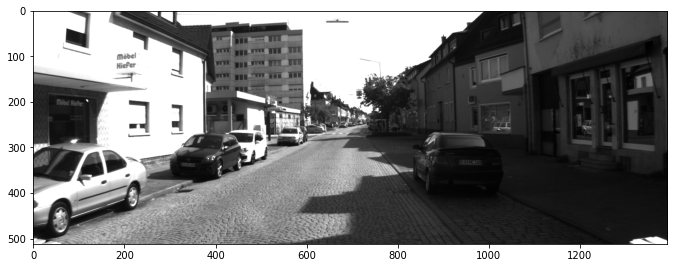

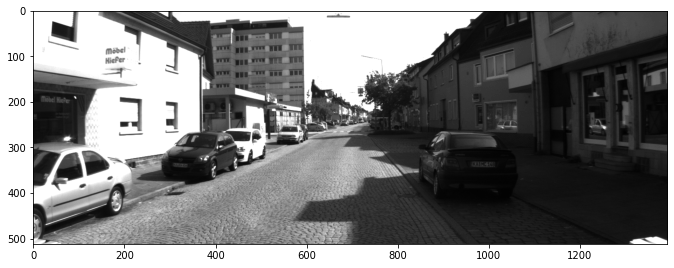

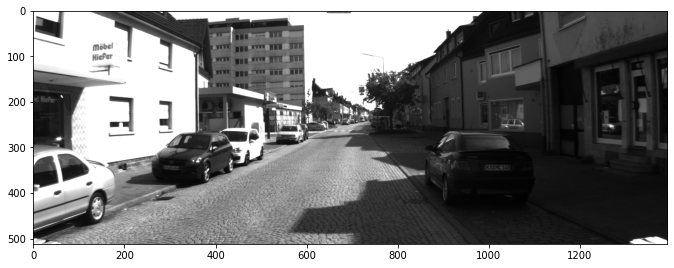

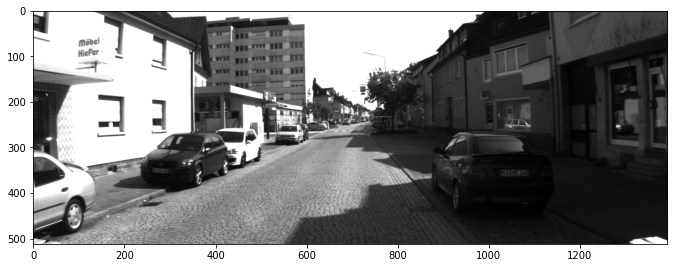

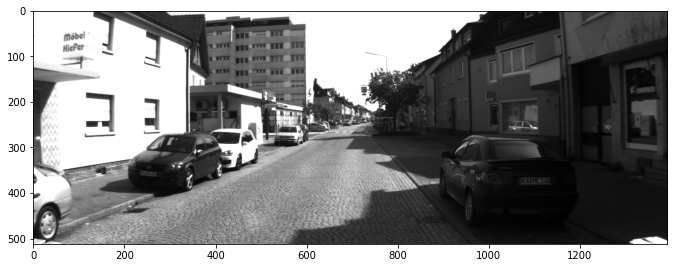

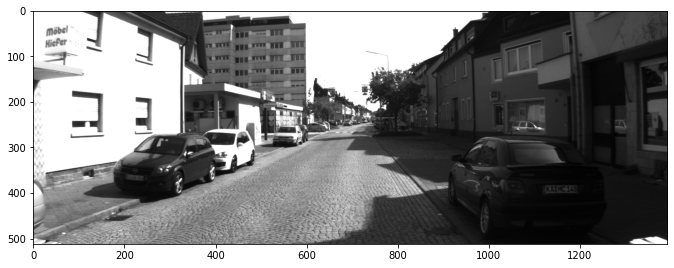

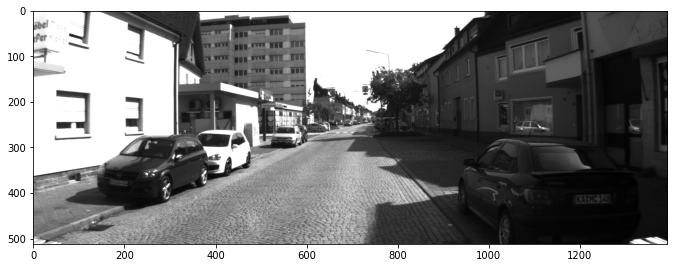

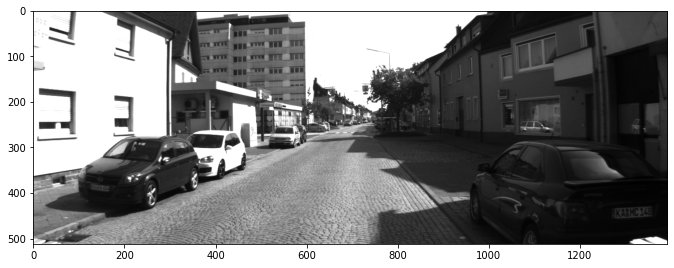

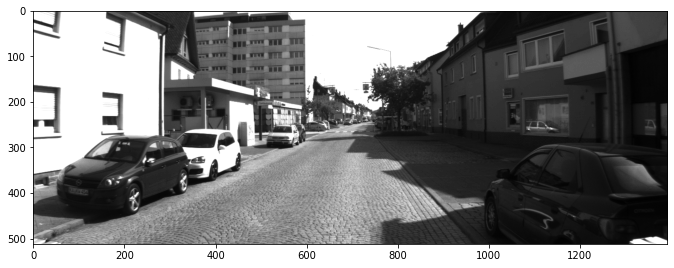

In [ ]:
names = os.listdir('/gdrive/My Drive/Final Project (8th Sem)/Frame_prediction_kitti/Train/')
names.sort()
print(names)
for i in range(len(X)):
  plt.figure(figsize=[25,25])

  plt.subplot(121)
  curr_img = np.reshape(X[i], (512,1392))
  #curr_lbl = train_labels[0]
  plt.imshow(curr_img, cmap='gray')

In [ ]:
# train_X,valid_X,train_ground,valid_ground = train_test_split(X, X, test_size=0.2, random_state=13)
# print(train_X.shape)
# print(valid_X.shape)

In [ ]:
train_X = X[0:22]
label_X = X[6:28]

train_ground = X[:22]

In [ ]:
batch_size = 1
epochs = 100
inChannel = 1
x, y = 512, 1392
input_img = Input(shape = (x, y, inChannel))
decoder_input= Input(shape = (32,87,256))

In [ ]:
#Architecture of the encoder
def encoder(input_img):
    conv1 = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img) 
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #256 x 696 x 128
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1) 
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #128 x 348 x 128
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2) #128 x 348 x 256
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #64 x 174 x 256
    # conv4=Conv2D(256,(3,3),activation='relu',padding='same')(pool3)
    # pool4=MaxPooling2D(pool_size=(2,2))(conv4) # 32 x 87 x 256
    return pool3

In [ ]:
# encoder = Model(input_img, encoder(input_img))
# encoder.summary()

In [ ]:
def decoder(decoder_input):
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(decoder_input) 
    up1 = UpSampling2D((2,2))(conv5) #64 x 174 x 128
    conv6 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1) 
    up2 = UpSampling2D((2,2))(conv6) #128 x 248 x 128
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2) 
    up3 = UpSampling2D((2,2))(conv7) # 256 x 692 x 128
    decoded = Conv2D(1, (7, 7), activation='relu', padding='same')(up3)
  #  up4 = UpSampling2D((2,2))(decoded)# 512 x 1392 x 256
   # decoded_2 = Conv2D(1, (7, 7), activation='tanh', padding='same')(up4)
    return decoded

In [ ]:
encoder = Model(input_img, encoder(input_img))
decoder = Model(decoder_input, decoder(decoder_input))
encoder.summary()
decoder.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 1392, 1)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 1392, 128)    6400      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 696, 128)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 696, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 348, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 348, 256)     295168    
___________________________________________

In [ ]:
encoded = encoder(input_img)
decoded = decoder(encoded)
print(encoded)
print(decoded)
auto_encoder = Model(input_img, decoded)
print(auto_encoder)
auto_encoder.compile(loss='mean_squared_error', optimizer = RMSprop())
auto_encoder.summary()

Tensor("model_1/max_pooling2d_3/MaxPool:0", shape=(?, 64, 174, 256), dtype=float32)
Tensor("model_2/conv2d_7/Relu:0", shape=(?, 512, 1392, 1), dtype=float32)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 1392, 1)      0         
_________________________________________________________________
model_1 (Model)              (None, 64, 174, 256)      449152    
_________________________________________________________________
model_2 (Model)              multiple                  596481    
Total params: 1,045,633
Trainable params: 1,045,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder_train = auto_encoder.fit(train_X, train_ground, batch_size=batch_size,epochs=100,verbose=1)

Epoch 1/100
22/22 [==============================] - 13s 582ms/step - loss: 0.0803
Epoch 2/100
22/22 [==============================] - 13s 582ms/step - loss: 0.6930
Epoch 3/100
22/22 [==============================] - 13s 578ms/step - loss: 0.1267
Epoch 4/100
22/22 [==============================] - 13s 577ms/step - loss: 0.0509
Epoch 5/100
22/22 [==============================] - 13s 576ms/step - loss: 0.3868
Epoch 6/100
22/22 [==============================] - 13s 575ms/step - loss: 0.0453
Epoch 7/100
22/22 [==============================] - 13s 576ms/step - loss: 0.0479
Epoch 8/100
22/22 [==============================] - 13s 576ms/step - loss: 0.0524
Epoch 9/100
22/22 [==============================] - 13s 577ms/step - loss: 0.0354
Epoch 10/100
22/22 [==============================] - 13s 577ms/step - loss: 0.0534
Epoch 11/100
22/22 [==============================] - 13s 576ms/step - loss: 0.0213
Epoch 12/100
22/22 [==============================] - 13s 576ms/step - loss: 0.0347
E

In [ ]:
# def decoder_final(code_combined):
#     conv_dec_1 = Conv2D(128, (3, 3), activation='relu', padding='same')(code_combined) 
#     conv_dec_2 = UpSampling2D((2,2))(conv_dec_1) #256 x 696 x 128
#     conv_dec_3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_dec_2) 
#     conv_dec_4 = UpSampling2D((2,2))(conv_dec_3) # 512 x 1392 x 256
#     decoded = Conv2D(1, (7, 7), activation='relu', padding='same')(conv_dec_4) 
#     up3 = UpSampling2D((2,2))(decoded)# 512 x 1392 x 256
#     decoded_2 = Conv2D(1, (7, 7), activation='tanh', padding='same')(up3)
#     up4 = UpSampling2D((2,2))(decoded_2)# 512 x 1392 x 256
#     return up4

def decoder_final(code_combined):
    conv_dec_1 = Conv2D(512, (3, 3), activation='relu', padding='same')(code_combined) 
    conv_dec_2 = UpSampling2D((2,2))(conv_dec_1) #128 x 348 x 1024
    conv_dec_3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv_dec_2) 
    conv_dec_4 = UpSampling2D((2,2))(conv_dec_3) # 256 x 692 x 256
    decoded = Conv2D(1, (7, 7), activation='tanh', padding='same')(conv_dec_4) 
    up3 = UpSampling2D((2,2))(decoded)# 512 x 1392 x 256
    return up3



def add_code_layers(frame_list, val):
  if val:
    temp=np.zeros((1, 512, 1392, 1))
  else:
    temp=np.zeros((64,174,256))
  for frame in frame_list:
    temp = np.add(temp,frame)
  temp=(1.0/(255*len(frame_list)))*temp
  return temp



def encoded_combined(train_X):
  train_encoded_list = []
  for i in range(0,22):
    temp = train_X[i:i+6]
    lis=[]
    for j in range(len(temp)):
      if j==0:
        reshaped=temp[j].reshape(-1,512,1392,1)
        #print(encoder.predict(reshaped).shape)
        lis.append(encoder.predict(reshaped)[0])
      else:
        temp_lis=[]
        temp_lis.append(temp[j].reshape(-1,512,1392,1))
        temp_lis.append(lis[j-1].reshape(-1,512,1392,1))
        
        # print('hi', lis[j-1].shape)
        # reshaped=lis[j-1].reshape(1,32,87,256)
        # print('hi', lis[j-1].shape)
        # upsampled=UpSampling2D((8,8))(tf.convert_to_tensor(reshaped))
        # #print(upsampled.shape)
        # temp_lis.append(upsampled.reshape(-1,512,1392,1))


        #print('temp_lis: ', temp_lis[j-1].shape, temp_lis[j].shape)
        added=add_code_layers(temp_lis, 1)
        #print('Added:', added)
        added=added.reshape(-1,512,1392,1)
        #print(encoder.predict(added).shape)
        lis.append(encoder.predict(added)[0])
        


    train_encoded_list.append(add_code_layers(lis, 0))
  return np.asarray(train_encoded_list) 


In [ ]:
train_data = encoded_combined(train_X)

In [ ]:
print(train_data.shape)

(22, 64, 174, 256)


In [ ]:
input_combined= Input(shape = (64, 174, 256))
decoder_combined = Model(input_combined,decoder_final(input_combined))
decoder_combined.compile(loss="mean_squared_error", optimizer=RMSprop())
decoder_combined.summary()


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 64, 174, 256)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 174, 512)      1180160   
_________________________________________________________________
up_sampling2d_21 (UpSampling (None, 128, 348, 512)     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 348, 256)     1179904   
_________________________________________________________________
up_sampling2d_22 (UpSampling (None, 256, 696, 256)     0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 256, 696, 1)       12545     
_________________________________________________________________
up_sampling2d_23 (UpSampling (None, 512, 1392, 1)      0   

In [ ]:
#label_X_new = X[6:22]
auto_encoder_final = decoder_combined.fit(train_data,label_X,batch_size=batch_size,epochs=100,verbose=1)

Epoch 1/100
22/22 [==============================] - 7s 305ms/step - loss: 0.1164
Epoch 2/100
22/22 [==============================] - 7s 302ms/step - loss: 0.1062
Epoch 3/100
22/22 [==============================] - 7s 305ms/step - loss: 0.0956
Epoch 4/100
22/22 [==============================] - 7s 306ms/step - loss: 0.0945
Epoch 5/100
22/22 [==============================] - 7s 306ms/step - loss: 0.0862
Epoch 6/100
22/22 [==============================] - 7s 305ms/step - loss: 0.0838
Epoch 7/100
22/22 [==============================] - 7s 303ms/step - loss: 0.0813
Epoch 8/100
22/22 [==============================] - 7s 305ms/step - loss: 0.0833
Epoch 9/100
22/22 [==============================] - 7s 302ms/step - loss: 0.0733
Epoch 10/100
22/22 [==============================] - 7s 301ms/step - loss: 0.0767
Epoch 11/100
22/22 [==============================] - 7s 305ms/step - loss: 0.0791
Epoch 12/100
22/22 [==============================] - 7s 302ms/step - loss: 0.0760
Epoch 13/100


In [ ]:
from skimage.measure import compare_ssim as ssim

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err


def compare_images(imageA, imageB):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure()
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [ ]:
#Prediction
for i in range(len(train_X)):
  temp = train_X[i:i+6]

  lis=[]
  for j in range(len(temp)):
    if j==0:
      reshaped=temp[j].reshape(-1,512,1392,1)
      print(encoder.predict(reshaped).shape)
      lis.append(encoder.predict(reshaped))
    else:
      temp_lis=[]
      temp_lis.append(temp[j].reshape(-1,512,1392,1))
      temp_lis.append(lis[j-1].reshape(-1,512,1392,1))
      #print('temp_lis: ', temp_lis[j-1].shape, temp_lis[j].shape)
      added=add_code_layers(temp_lis, 1)
      #print('Added:', added)
      added=added.reshape(-1,512,1392,1)
      print(encoder.predict(added).shape)
      lis.append(encoder.predict(added))
    
  final_pred = decoder_combined.predict(add_code_layers(lis, 0))
  plt.figure(figsize=(150, 150))
  print("Reconstruction of Test Images")
  for i in range(1):
      plt.subplot(2, 10, i+1)
      plt.imshow(final_pred[i, ..., 0], cmap='gray')  
  plt.show()



In [ ]:
#Prediction
for i in range(0,22):
  temp = train_X[i:i+6]

  lis=[]
  for j in range(len(temp)):
    if j==0:
      reshaped=temp[j].reshape(-1,512,1392,1)
      print(encoder.predict(reshaped).shape)
      lis.append(encoder.predict(reshaped))
    else:
      temp_lis=[]
      temp_lis.append(temp[j].reshape(-1,512,1392,1))
      temp_lis.append(lis[j-1].reshape(-1,512,1392,1))
      #print('temp_lis: ', temp_lis[j-1].shape, temp_lis[j].shape)
      added=add_code_layers(temp_lis, 1)
      #print('Added:', added)
      added=added.reshape(-1,512,1392,1)
      print(encoder.predict(added).shape)
      lis.append(encoder.predict(added))
    
  final_pred = decoder_combined.predict(add_code_layers(lis, 0))
  print("The input sequence ",i,i+1,i+2,i+3)
  plt.figure(figsize=(100, 100))
  for j in range(i,i+4):
    plt.subplot(2,13,j+1)
    plt.imshow(train_X[j,...,0],cmap='gray')
  plt.show()
  print("Predicted Output for the sequence is ")
  plt.figure(figsize=(100, 100))
  plt.subplot(2,13,1)
  plt.imshow(final_pred[(i),...,0],cmap='gray')
  plt.show()
  print("Original Output for the sequence is ")
  plt.figure(figsize=(100, 100))
  plt.subplot(2,13,1)
  plt.imshow(label_X[(i),...,0],cmap='gray')
  plt.show()

  compare_images(final_pred[(i),...,0], label_X[(i),...,0])